# Importing Meaningful packages

In [50]:
pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 29.0 MB/s eta 0:00:00m eta 0:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [cartopy]━━━ 3/4 [cartopy]
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install requests netCDF4 matplotlib pandas numpy psycopg2 configparser sqlalchemy xarray

Note: you may need to restart the kernel to use updated packages.


In [1]:

from datetime import datetime
from matplotlib import pyplot as plt
import pandas as pd
import netCDF4
import os

import matplotlib as mpl
import matplotlib.animation as animation
import matplotlib.pyplot    as plt
import numpy as np
from datetime import datetime, timedelta

import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Visualization of past temperatures in city: Brussels

dict_keys(['time', 'y', 'x', 'T2M'])
dict_keys(['time', 'y', 'x'])
<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    crs: EPSG:3035
    title: Daily maximum temperature for Brussels for 2017
    institution: Flemish Insitute for Technological Research (VITO)
    creator: Niels Souverijns (niels.souverijns@vito.be)
    source: UrbClim (De Ridder et al., 2015)
    dimensions(sizes): time(365), y(301), x(301)
    variables(dimensions): int64 time(time), float64 y(y), float64 x(x), int32 T2M(time, y, x)
    groups: 
The day number : 270


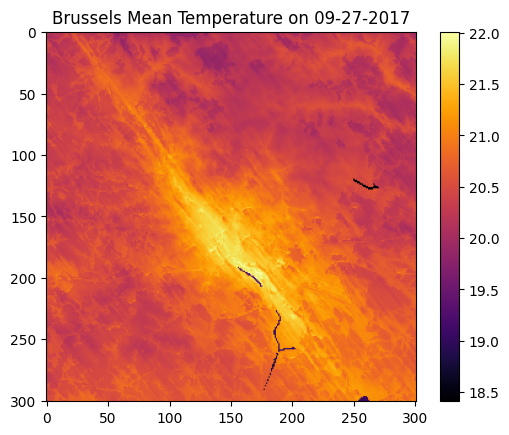

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jan 31 15:08:18 2025

@author: jonathanhachez
"""



fp='/home/vub-flow/Documents/Code JuDGE/T2M_year_daily_max_2017.nc'
nc = netCDF4.Dataset(fp)

print(nc.variables.keys())  # Lists available variables
print(nc.dimensions.keys())  # Lists dimensions
print(nc)  # Prints dataset summary


 
# initializing day number
day_num = "270"
 
# print day number
print("The day number : " + str(day_num))
 
# adjusting day num
day_num.rjust(3 + len(day_num), '0')
 
# Initialize year
year = "2017"
 
# converting to date
res = datetime.strptime(year + "-" + day_num, "%Y-%j").strftime("%m-%d-%Y")

plt.imshow(nc["T2M"][int(day_num)]-273.15, cmap = mpl.colormaps["inferno"])
plt.title("Brussels Mean Temperature on %s" %res)
plt.colorbar()
plt.show()

# Data from IRM
## Data world

In [3]:
fp = '/media/vub-flow/bkp_fettweis/nicghil/CMIP6_3hr/CNRM-ESM2-1/ssp119/tas_3hr_CNRM-ESM2-1_ssp119_r1i1p1f2_gr_201501010300-204001010000.nc'
nc = netCDF4.Dataset(fp)
print(nc.variables.keys())  # Lists available variables
print(nc.dimensions.keys())  # Lists dimensions
print(nc)  # Prints dataset summary


dict_keys(['lat', 'lon', 'height', 'time', 'time_bounds', 'tas'])
dict_keys(['lat', 'lon', 'time', 'axis_nbounds'])
<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7 CMIP-6.2
    creation_date: 2018-12-01T14:23:57Z
    description: Future scenario with low radiative forcing throughout reaching about 1.9 W/m2 in 2100 based on SSP1. Concentration-driven
    title: CNRM-ESM2-1 model output prepared for CMIP6 / ScenarioMIP ssp119
    activity_id: ScenarioMIP
    contact: contact.cmip@meteo.fr
    data_specs_version: 01.00.21
    dr2xml_version: 1.13
    experiment_id: ssp119
    experiment: low-end scenario reaching 1.9 W m-2, based on SSP1
    external_variables: areacella
    forcing_index: 2
    frequency: 3hrPt
    further_info_url: https://furtherinfo.es-doc.org/CMIP6.CNRM-CERFACS.CNRM-ESM2-1.ssp119.none.r1i1p1f2
    grid: data regridded to a T127 gaussian grid (128x256 latlon) from a native atmosphere T127l reduced gaussian grid
    

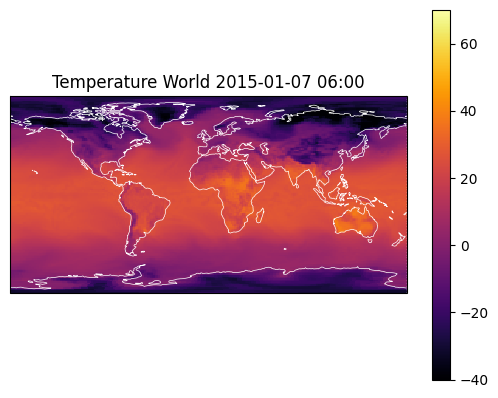

In [5]:

k = 50
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the start date
start_date = datetime(2015, 1, 1, 0, 0, 0)  # 01-01-2015 00:00:00

new_date = start_date + timedelta(hours=3 * k)
# Format the date for matplotlib (e.g., "2015-01-01 15:00:00")
date_str = new_date.strftime("%Y-%m-%d %H:%M")

t2m = nc["tas"][k, :, :] -273.15
lon = nc["lon"][:]  # Make sure this is the correct variable name
lat = nc["lat"][:]  # Make sure this is the correct variable name
time = nc["time"][:]  # Make sure this is the correct variable name

im = plt.pcolormesh(lon, lat, t2m, 
                 cmap="inferno",
                 vmin=-40,
                 vmax=70,
                 shading='auto')

ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor = 'white')




plt.title(f"Temperature World {date_str}")
plt.colorbar()
plt.show()
 

In [10]:
fp = '/media/vub-flow/bkp_fettweis/nicghil/CMIP6_3hr/CNRM-ESM2-1/ssp245/tas_3hr_CNRM-ESM2-1_ssp245_r1i1p1f2_gr_204001010300-206501010000.nc'
nc = netCDF4.Dataset(fp)
print(nc.variables.keys())  # Lists available variables
print(nc.dimensions.keys())  # Lists dimensions
print(nc)  # Prints dataset summary

dict_keys(['lat', 'lon', 'height', 'time', 'time_bounds', 'tas'])
dict_keys(['lat', 'lon', 'time', 'axis_nbounds'])
<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7 CMIP-6.2
    creation_date: 2018-08-22T09:04:44Z
    description: Future scenario with medium radiative forcing by the end of century. Following approximately RCP4.5 global forcing pathway but with new forcing based on SSP2. Concentration-driven
    title: CNRM-ESM2-1 model output prepared for CMIP6 / ScenarioMIP ssp245
    activity_id: ScenarioMIP
    contact: contact.cmip@meteo.fr
    data_specs_version: 01.00.21
    dr2xml_version: 1.13
    experiment_id: ssp245
    experiment: update of RCP4.5 based on SSP2
    external_variables: areacella
    forcing_index: 2
    frequency: 3hrPt
    further_info_url: https://furtherinfo.es-doc.org/CMIP6.CNRM-CERFACS.CNRM-ESM2-1.ssp245.none.r1i1p1f2
    grid: data regridded to a T127 gaussian grid (128x256 latlon) from a native atmos

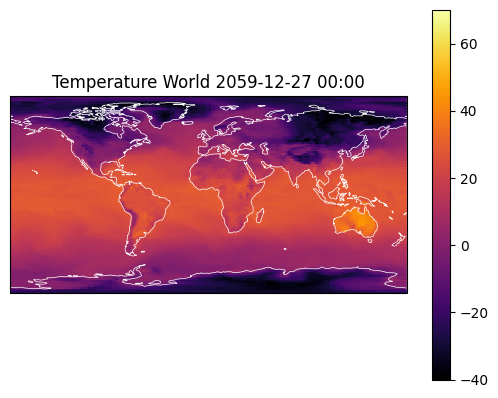

In [11]:
# converting to date
# res = datetime.strptime(year + "-" + day_num, "%Y-%j").strftime("%m-%d-%Y")

def plot_heat_map(k):
    k = k + 8760/3*20
    plt.clf()# Assuming nc["tas"][k,:,:] is your 2D array
    
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    t2m = nc["tas"][k, :, :] -273.15
    lon = nc["lon"][:]  # Make sure this is the correct variable name
    lat = nc["lat"][:]  # Make sure this is the correct variable name
    
    im = plt.pcolormesh(lon, lat, t2m, 
                     cmap="inferno",
                     vmin=-40,
                     vmax=70,
                     shading='auto')
    
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor = 'white')

    # Define the start date
    start_date = datetime(2040, 1, 1, 0, 0, 0)  # 01-01-2015 00:00:00
    
    new_date = start_date + timedelta(hours=3 * k)
    
    # Format the date for matplotlib (e.g., "2015-01-01 15:00:00")
    date_str = new_date.strftime("%Y-%m-%d %H:%M")
    
    plt.title(f"Temperature World {date_str}")
    plt.colorbar()
    return plt

anim = animation.FuncAnimation(plt.figure(), plot_heat_map, interval = 1, frames = 24*3*7, repeat = False)
writer = animation.PillowWriter(fps = 20, metadata=dict(artist='Me'),bitrate=1800)
anim.save('projection.gif', writer = writer)

## Belgium

In [27]:
fp = '/home/vub-flow/Downloads/MARv3.14-EC-Earth3-Veg-ssp245-2035.nc'
nc = netCDF4.Dataset(fp)

print(nc.variables.keys())  # Lists available variables
print(nc.dimensions.keys())  # Lists dimensions
print(nc)  # Prints dataset summary

dict_keys(['CC', 'DD', 'DIST', 'EP', 'ET', 'HH', 'LAT', 'LHF', 'LON', 'LWD', 'MIN', 'MM', 'Q2m', 'RF', 'RH2m', 'RO1', 'RO2', 'RO3', 'RO4', 'RO5', 'RO6', 'RU', 'SF', 'SH', 'SHF', 'SH_MAR', 'SL', 'SLP', 'SMB', 'SN', 'SP', 'SQC', 'SQM', 'ST', 'SWD', 'SWDD', 'T2m', 'U10m', 'U2m', 'YYYY', 'ZN', 'time', 'x', 'y'])
dict_keys(['time', 'y', 'x'])
<class 'netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: Hourly MARv3.14 outputs in 2035 interpolated on the 5x5km^2 grid from IRM using EC-Earth3-Veg-ssp245
    institution: University of Liège (Belgium)
    netcdf: 4.4.1 of Mar 21 2022 20:38:41 $
    institute: University of Liege (Belgium)
    NCO: netCDF Operators version 5.1.7 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco, DOI = 10.1016/j.envsoft.2008.03.004)
    contact: xavier.fettweis@uliege.be
    history: Sat Dec 30 20:42:51 2023: ncks -4 --cnk_dmn y,55 --cnk_dmn x,66 --cnk_dmn time,1 -L 4 out/MARv3.14-EC-Earth3-Veg-ssp245-2035.nc out/M

<Figure size 1000x800 with 0 Axes>

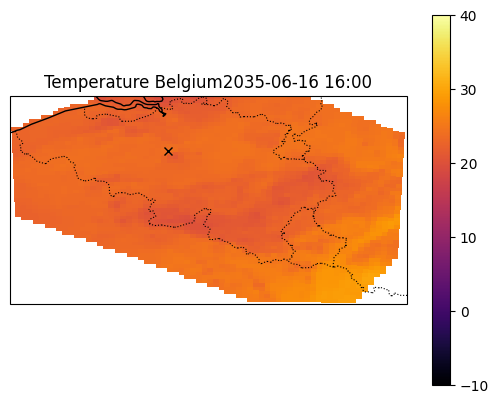

In [66]:


# converting to date
# res = datetime.strptime(year + "-" + day_num, "%Y-%j").strftime("%m-%d-%Y")

plt.figure(figsize=(10, 8))
def plot_heat_map(k):
    k = k + 4000
    # k = k + 8760/3*20
    plt.clf()# Assuming nc["tas"][k,:,:] is your 2D array
    # Set up the map projection
    
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    
    t2m = nc["T2m"][k, :, :]
    lon = nc["LON"][:]  # Make sure this is the correct variable name
    lat = nc["LAT"][:]  # Make sure this is the correct variable name
    
    im = plt.pcolormesh(lon, lat, t2m, 
                     cmap="inferno",
                     vmin=-10,
                     vmax=40,
                     shading='auto')


    plt.plot(4.3572,50.8477, marker = 'x',color = 'black')
    plt.colorbar()
    
    # Add geographic features directly to current axes
    ax.add_feature(cfeature.COASTLINE, linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.8)
    
    # Define the start date
    start_date = datetime(2035, 1, 1, 0, 0, 0)  # 01-01-2015 00:00:00
    
    new_date = start_date + timedelta(hours=1 * k)
    
    # Format the date for matplotlib (e.g., "2015-01-01 15:00:00")
    date_str = new_date.strftime("%Y-%m-%d %H:%M")
    
    plt.title(f"Temperature Belgium {date_str}")
    return plt

# cbar = fig.colorbar(im, ax=ax)
anim = animation.FuncAnimation(plt.figure(), plot_heat_map, interval = 10, frames = 7*24, repeat = False)
writer = animation.PillowWriter(fps = 14, metadata=dict(artist='Me'),bitrate=1800)
anim.save('BelgiumSummer.gif', writer = writer)

# Temperature projections in Belgium

To do manipulat these heavy data, we will use postgreSQL instead of csv files. Here is the query we used for the postgresql:

```
-- First, enable the TimescaleDB extension (requires superuser privileges)
CREATE EXTENSION IF NOT EXISTS timescaledb;

-- Then create your table
CREATE TABLE worldwide_res (
    time TIMESTAMP WITHOUT TIME ZONE, 
    ssp TEXT, 
    temperature FLOAT,
    PRIMARY KEY (ssp, time)
);

-- Convert it to a hypertable
SELECT create_hypertable(
    'worldwide_res', 
    'time', 
    chunk_time_interval => INTERVAL '1 week',
    partitioning_column => 'ssp',
    number_partitions => 5
);
```


In [3]:
import psycopg2
from configparser import ConfigParser
from sqlalchemy import create_engine, Table, MetaData, insert

# import os
import numpy as np


def config(filename=r"db_config.ini", section="postgresql"):
    parser = ConfigParser()
    parser.read(filename)
    
    if not parser.has_section(section):
        raise ValueError(f"Section '{section}' not found in the configuration file.")
        
    return {key: value for key, value in parser.items(section)}


# psycopg2 connection (for raw SQL)
def connect():
    params = config()
    return psycopg2.connect(**params)

# SQLAlchemy connection (for cleaner code)
def connect_SQL_alchemy():
    params = config()
    db_url = f"postgresql+psycopg2://{params['user']}:{params['password']}@{params['host']}:{params['port']}/{params['database']}"
    return create_engine(db_url)

['tas_3hr_CNRM-ESM2-1_ssp119_r1i1p1f2_gr_201501010300-204001010000.nc', 'tas_3hr_CNRM-ESM2-1_ssp119_r1i1p1f2_gr_204001010300-206501010000.nc', 'tas_3hr_CNRM-ESM2-1_ssp119_r1i1p1f2_gr_206501010300-209001010000.nc', 'tas_3hr_CNRM-ESM2-1_ssp119_r1i1p1f2_gr_209001010300-210101010000.nc']
dict_keys(['lat', 'lon', 'height', 'time', 'time_bounds', 'tas'])
dict_keys(['lat', 'lon', 'time', 'axis_nbounds'])
['2015-01-01T03:00:00.000000' '2015-01-01T06:00:00.000000'
 '2015-01-01T09:00:00.000000' ... '2039-12-31T18:00:00.000000'
 '2039-12-31T21:00:00.000000' '2040-01-01T00:00:00.000000']
dict_keys(['lat', 'lon', 'height', 'time', 'time_bounds', 'tas'])
dict_keys(['lat', 'lon', 'time', 'axis_nbounds'])
['2040-01-01T03:00:00.000000' '2040-01-01T06:00:00.000000'
 '2040-01-01T09:00:00.000000' ... '2064-12-31T18:00:00.000000'
 '2064-12-31T21:00:00.000000' '2065-01-01T00:00:00.000000']
dict_keys(['lat', 'lon', 'height', 'time', 'time_bounds', 'tas'])
dict_keys(['lat', 'lon', 'time', 'axis_nbounds'])
['2

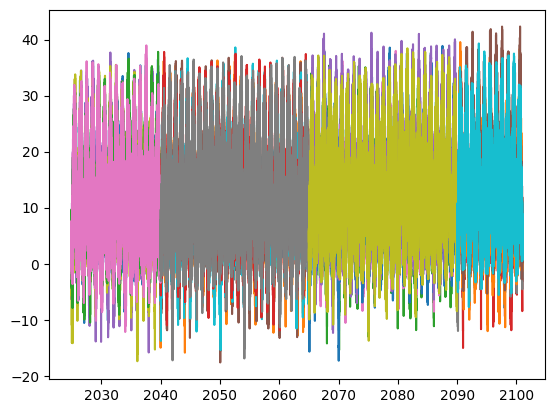

In [69]:
def transfer_content(fp, startdate, stopdate, ssp):
    try:
        nc = netCDF4.Dataset(fp)
        
        # converting to date
        # res = datetime.strptime(year + "-" + day_num, "%Y-%j").strftime("%m-%d-%Y")
        
        
        start_date = startdate
        stop_date  = stopdate
        longitude  = 4.3572
        latitude   = 50.8477
        
        k_y = np.round((latitude + 90) / 180 * 128)
        k_x = np.round(longitude / 180 * 256)
        
        # Create time array correctly
        time = np.arange(np.datetime64(start_date), np.datetime64(stop_date) + 1, np.timedelta64(3, 'h'))
        
        select = np.datetime64(datetime(2025, 1, 1, 0, 0, 0))
        
        df = pd.DataFrame()
        df['time'] = time
        df['temperature'] = nc["tas"][:, k_y, k_x] - 273.15
        df['ssp'] = ssp
        
        engine = connect_SQL_alchemy()
        df.to_sql('worldwide_res', engine, if_exists='append',index=False)
    except Exception as e:
        print(e)
    

# get some files
for ssp in ['ssp119','ssp126','ssp245']:
    
    list_files = os.listdir(f'/media/vub-flow/bkp_fettweis/nicghil/CMIP6_3hr/CNRM-ESM2-1/{ssp}/')
    list_temp = [file for file in list_files if file[0:3] == 'tas']
    format_code = "%Y%m%d%H%M"
    print(list_temp)
    for file in list_temp:
        startdate = file[-28:-16]
        stopdate = file[-15:-3]
        parsed_date_start = datetime.strptime(startdate, format_code)
        parsed_date_stop  = datetime.strptime(stopdate, format_code)
        pathname = f'/media/vub-flow/bkp_fettweis/nicghil/CMIP6_3hr/CNRM-ESM2-1/{ssp}/{file}'
        transfer_content(pathname, parsed_date_start, parsed_date_stop, ssp)


list_files = os.listdir(f'/media/vub-flow/bkp_fettweis/nicghil/CMIP6_3hr/CNRM-ESM2-1/ssp585/tas/')
list_temp = [file for file in list_files if file[0:3] == 'tas']
format_code = "%Y%m%d%H%M"
print(list_temp)
for file in list_temp:
    startdate = file[-28:-16]
    stopdate = file[-15:-3]
    parsed_date_start = datetime.strptime(startdate, format_code)
    parsed_date_stop  = datetime.strptime(stopdate, format_code)
    pathname = f'/media/vub-flow/bkp_fettweis/nicghil/CMIP6_3hr/CNRM-ESM2-1/ssp585/tas/{file}'
    transfer_content(pathname, parsed_date_start, parsed_date_stop, 'ssp585')


list_files = os.listdir(f'/media/vub-flow/bkp_fettweis/nicghil/CMIP6_3hr/')
list_temp = [file for file in list_files if file[0:3] == 'tas']
format_code = "%Y%m%d%H%M"
print(list_temp)
for file in list_temp:
    startdate = file[-28:-16]
    stopdate = file[-15:-3]
    parsed_date_start = datetime.strptime(startdate, format_code)
    parsed_date_stop  = datetime.strptime(stopdate, format_code)
    pathname = f'/media/vub-flow/bkp_fettweis/nicghil/CMIP6_3hr/{file}'
    transfer_content(pathname, parsed_date_start, parsed_date_stop, 'ssp370')


/tmp/ipykernel_1227804/2934544251.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


      ssp    year       p05       p25        p50        p75        p95
0  ssp119  2015.0 -2.642712  3.328973  10.911279  17.012094  23.512784
1  ssp119  2016.0 -3.921127  3.558389  10.948083  17.739626  26.510445
2  ssp119  2017.0 -1.104399  5.567476  10.806345  17.215974  25.811133
3  ssp119  2018.0 -0.586977  4.383195  10.599008  17.797670  25.626668
4  ssp119  2019.0 -0.263078  4.699495   9.999948  16.387216  23.202121


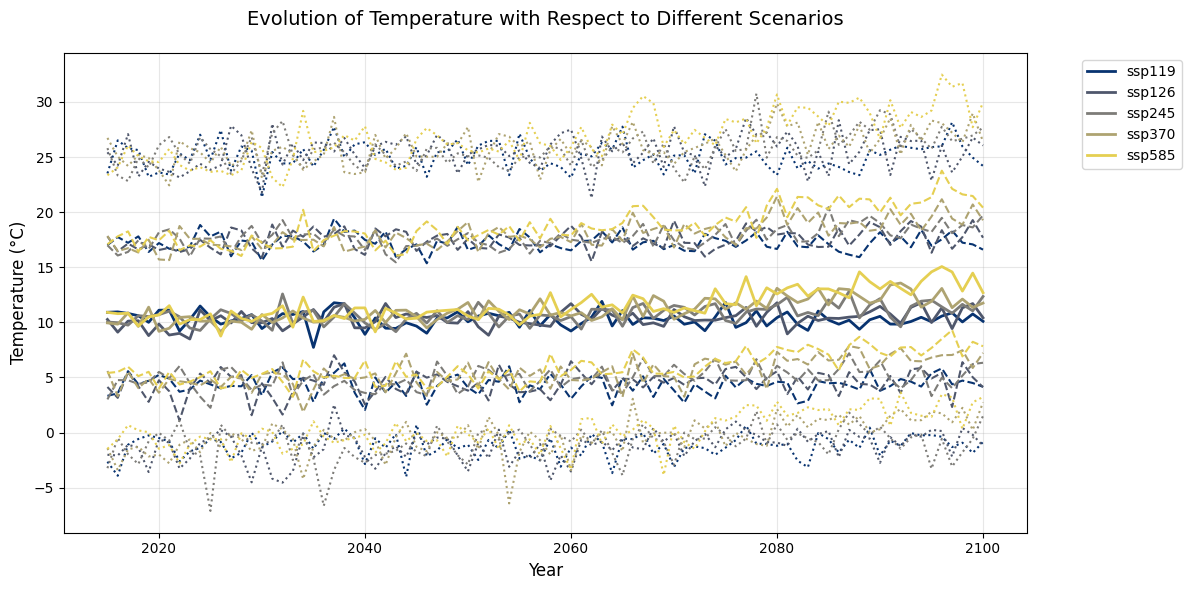

In [21]:
# SQL query
query = """
SELECT
    ssp,
    EXTRACT(year FROM time) as year,
    percentile_cont(0.05) WITHIN GROUP (order by temperature) as p05,
    percentile_cont(0.25) WITHIN GROUP (order by temperature) as p25,
    percentile_cont(0.50) WITHIN GROUP (order by temperature) as p50,
    percentile_cont(0.75) WITHIN GROUP (order by temperature) as p75,
    percentile_cont(0.95) WITHIN GROUP (order by temperature) as p95
FROM worldwide_res
GROUP BY 
    ssp, year
ORDER BY
    ssp, year;
"""

try:
    # Connect to the database
    conn = connect()
    
    # Execute the query and fetch results into a pandas DataFrame
    df = pd.read_sql_query(query, conn)
    df = df[df['year'] < 2101]
    # Display the results
    print(df.head())
    
    
except Exception as e:
    print(f"Error: {e}")
    
finally:
    if conn:
        conn.close()

# Set up the plot
plt.figure(figsize=(12, 6))

# Get unique SSP scenarios
ssps = df['ssp'].unique()
colors = plt.cm.cividis(np.linspace(0.1, 0.9, len(ssps)))  # Different colors for each SSP

# Plot each SSP scenario
for ssp, color in zip(ssps, colors):
    ssp_data = df[df['ssp'] == ssp]
    
    # Plot the percentiles with different line styles
    plt.plot(ssp_data['year'], ssp_data['p05'], 
             linestyle=':', color=color)  # Dotted
    plt.plot(ssp_data['year'], ssp_data['p95'], 
             linestyle=':', color=color)  # Dotted (no duplicate label)
    
    plt.plot(ssp_data['year'], ssp_data['p25'], 
             linestyle='--', color=color)  # Dashed
    plt.plot(ssp_data['year'], ssp_data['p75'], 
             linestyle='--', color=color)  # Dashed (no duplicate label)
    
    plt.plot(ssp_data['year'], ssp_data['p50'], 
             linestyle='-', color=color, label=f'{ssp}', linewidth=2)  # Solid

# Customize the plot
plt.title('Evolution of Temperature with Respect to Different Scenarios', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside

# Adjust layout to prevent legend cutoff
plt.tight_layout()

# Show the plot
plt.show()


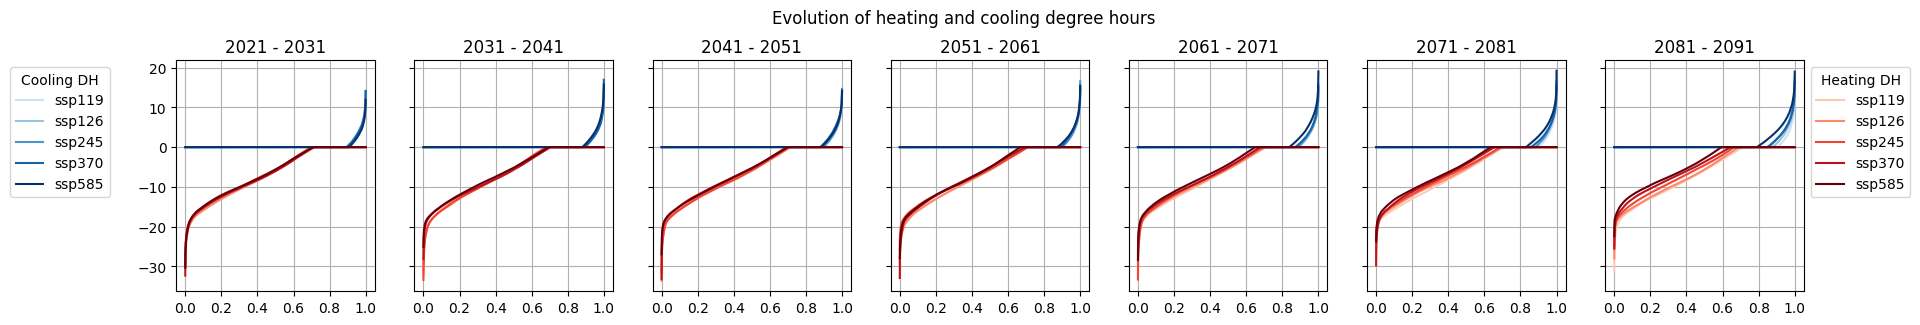

In [12]:
query = """
select
	ssp,
	time,
	temperature
from worldwide_res;
"""

try:
    # Connect to the database
    conn = connect_SQL_alchemy()
    
    # Execute the query and fetch results into a pandas DataFrame
    df = pd.read_sql_query(query, conn)
    df['time'] = pd.to_datetime(df['time'])

    # Convert to datetime
    df['time'] = pd.to_datetime(df['time'])
    
    # Resample with interpolation for temperature and ffill for ssp
    df = (
        df.set_index('time')
        .groupby('ssp', group_keys=False)
        .resample('1h')
        .agg({
            'ssp': 'ffill',          # Forward-fill SSP (categorical)
            'temperature': 'interpolate'  # Linear interpolation for temperature
        })
        .reset_index()
        .drop_duplicates(subset=['ssp', 'time'])  # Avoid duplicates
    )


    df['T_max'] = 22
    df['T_min'] = 16
    
    # mask = ((df['time'].dt.hour < 9) | (df['time'].dt.hour > 19)) | (df['time'].dt.dayofweek >= 5)    
    # df.loc[mask,'T_max'] = 30
    # df.loc[mask,'T_min'] = 9
    
    df['CDH'] = df['temperature'] -  df['T_max']
    df['HDH'] = df['T_min'] - df['temperature']

    df.loc[df['CDH']<0,'CDH'] = 0
    df.loc[df['HDH']<0,'HDH'] = 0

    year_interval = np.timedelta64(10, 'Y').astype('timedelta64[us]')

    
    # Get unique SSP scenarios
    ssps = df['ssp'].unique()
    colors_cold = plt.cm.Blues(np.linspace(0.2, 1, len(ssps)))  # Different colors for each SSP
    colors_hot = plt.cm.Reds(np.linspace(0.2, 1, len(ssps)))  # Different colors for each SSP
    
    # Plot each SSP scenario
    
    # fig = plt.figure(figsize = (21,3))
    fig, axs = plt.subplots(nrows=1, ncols=7, sharex=False, sharey=True, figsize = (21,3))
    fig.suptitle('Evolution of heating and cooling degree hours', y = 1.05)
    for k in range(7):
        ax = axs[k]
        
        start = np.datetime64(datetime(2021 + k * 10, 1, 1, 0, 0, 0))
        stop = start + year_interval
        # plt.title(f"{start} - {stop}")
        for ssp, color_c, color_h in zip(ssps, colors_cold, colors_hot):
            
            mask = (df['time'] >= start) & (df['time'] <= stop) & (df['ssp'] == ssp)
            sample_CDH = df.loc[mask, 'CDH'].sort_values()
            sample_HDH = (-df.loc[mask, 'HDH']).sort_values()

            start_year = start.astype('datetime64[Y]').astype(int) + 1970
            stop_year = stop.astype('datetime64[Y]').astype(int) + 1970
            ax.set_title(f"{start_year} - {start_year+10}")
    

            
            label_c = ssp if k == 0 else ''
            label_h = ssp if k == 6 else ''
            ax.plot(np.linspace(0,1,len(sample_CDH)), sample_CDH, color = color_c, label = label_c)# Correct way to format the title with year ranges
            ax.plot(np.linspace(0,1,len(sample_HDH)), sample_HDH, color = color_h, label = label_h)# Correct way to format the title with year ranges
            ax.grid()
            # locs, labels = xticks()  # Get the current locations and labels.
            
            ax.set_xticks(np.arange(0, 1.1, step=0.2))  # Set label locations.
            
            if k == 6:
                ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title = "Heating DH")
            elif k == 0:
                ax.legend(loc='upper right', bbox_to_anchor=(-0.3, 1), title = "Cooling DH")
    plt.savefig('Evolution of CDH HDH.pdf')
except Exception as e:
    print(f"Error: {e}")

    


# Computing representative degree hours

In [5]:
query = """
select
	ssp,
	time,
	temperature
from worldwide_res;
"""

try:
    # Connect to the database
    conn = connect_SQL_alchemy()
    
    # Execute the query and fetch results into a pandas DataFrame
    df = pd.read_sql_query(query, conn)
    df['time'] = pd.to_datetime(df['time'])

    # Convert to datetime
    df['time'] = pd.to_datetime(df['time'])
    
    # Resample with interpolation for temperature and ffill for ssp
    df = (
        df.set_index('time')
        .groupby('ssp', group_keys=False)
        .resample('1h')
        .agg({
            'ssp': 'ffill',          # Forward-fill SSP (categorical)
            'temperature': 'interpolate'  # Linear interpolation for temperature
        })
        .reset_index()
        .drop_duplicates(subset=['ssp', 'time'])  # Avoid duplicates
    )


    df['T_max'] = 22
    df['T_min'] = 16
    
    mask = ((df['time'].dt.hour < 9) | (df['time'].dt.hour > 19)) | (df['time'].dt.dayofweek >= 5)    
    df.loc[mask,'T_max'] = 30
    df.loc[mask,'T_min'] = 9
    
    df['CDH'] = df['temperature'] -  df['T_max']
    df['HDH'] = df['T_min'] - df['temperature']

    df.loc[df['CDH']<0,'CDH'] = 0
    df.loc[df['HDH']<0,'HDH'] = 0


    # Calculate quantiles (excluding zeros)
    quant_HDH = df['HDH'].loc[df['HDH'] > 0].quantile(np.linspace(0, 1, 21))
    quant_CDH = df['CDH'].loc[df['CDH'] > 0].quantile(np.linspace(0, 1, 21))
    
    # Add 0 to the quantiles (as a separate category)
    quant_HDH_with_zero = np.concatenate([[0], quant_HDH.values])
    quant_CDH_with_zero = np.concatenate([[0], quant_CDH.values])
    
    print(quant_HDH_with_zero)
    print(quant_CDH_with_zero)
    def project_to_quantiles(values, quantiles):
        values = np.asarray(values)
        quantiles = np.asarray(quantiles)
        idx = np.abs(np.subtract.outer(values, quantiles)).argmin(axis=1)
        return quantiles[idx]
    
    # Apply quantization to HDH and CDH columns
    df['HDH_quantized'] = project_to_quantiles(df['HDH'], quant_HDH_with_zero)
    df['CDH_quantized'] = project_to_quantiles(df['CDH'], quant_CDH_with_zero)
    
    # # Define time periods
    year_intervals = [(
        np.datetime64(datetime(2021 + k * 10, 1, 1)),
        np.datetime64(datetime(2021 + (k + 1) * 10, 1, 1))
    ) for k in range(7)]
    
    # # Create a DataFrame with all combinations we want to count
    # index = pd.MultiIndex.from_product([
    #     ssps,
    #     [f"{start.astype('datetime64[Y]').astype(int) + 1970}-{end.astype('datetime64[Y]').astype(int) + 1970}" 
    #      for start, end in year_intervals],
    #     ['HDH', 'CDH'],
    #     np.concatenate([[0], quant_HDH.values])  # All quantiles including 0
    # ], names=['ssp', 'period', 'variable', 'quantile'])
    
    # # Create empty result DataFrame
    # results = pd.DataFrame(index=index).reset_index()
    
    # # Add time period boundaries
    # results[['start_year', 'end_year']] = results['period'].str.split('-', expand=True).astype(int)
    
    # Vectorized counting function
    def get_counts(df, value_col, label):
        out = (
            df.assign(
                period=pd.cut(
                    df['time'],
                    bins=[t[0] for t in year_intervals] + [year_intervals[-1][1]],
                    labels=[
                        f"{t[0].astype('datetime64[Y]').astype(int) + 1970}-{t[1].astype('datetime64[Y]').astype(int) + 1970}"
                        for t in year_intervals
                    ]
                )
            )
            .groupby(['ssp', 'period'])[value_col]
            .value_counts()
            .rename('count')
            .reset_index()
            .rename(columns={value_col: 'quantile'})
            .assign(variable=label)
        )
        return out
    
    # Get counts
    hdh_counts = get_counts(df, 'HDH_quantized', 'HDH')
    cdh_counts = get_counts(df, 'CDH_quantized', 'CDH')
    
    # Combine and merge with result template
    # Combine and merge with result template
    results = (
        pd.concat([hdh_counts, cdh_counts], ignore_index=True)
        .fillna({'count': 0})
        .sort_values(['ssp', 'period', 'variable', 'quantile'])
    )
    
    results.to_csv('degree_hours.csv')

except Exception as e:
    print(f"Error: {e}")

    


[0.00000000e+00 2.64485677e-05 6.21908569e-01 1.23366903e+00
 1.83515015e+00 2.43077189e+00 3.03137817e+00 3.63480225e+00
 4.23828735e+00 4.84741821e+00 5.46485494e+00 6.09204712e+00
 6.74573364e+00 7.42415975e+00 8.12185771e+00 8.81697184e+00
 9.54146423e+00 1.03686076e+01 1.13660492e+01 1.27873393e+01
 1.49491384e+01 3.18296570e+01]
[0.00000000e+00 3.45865886e-05 2.86584473e-01 5.82147217e-01
 8.83386230e-01 1.19264119e+00 1.51648865e+00 1.84905396e+00
 2.20259247e+00 2.56795654e+00 2.96079915e+00 3.36797485e+00
 3.79624837e+00 4.26107178e+00 4.77202504e+00 5.33524475e+00
 5.96098480e+00 6.67320150e+00 7.51457367e+00 8.55979309e+00
 1.01126877e+01 2.03302551e+01]


/tmp/ipykernel_1227804/479798754.py:102: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['ssp', 'period'])[value_col]
/tmp/ipykernel_1227804/479798754.py:102: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['ssp', 'period'])[value_col]
